In [542]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder

In [543]:
# reading the copper dataset as pandas dataframe

data = pd.read_csv(r"/Users/gokul/My Apple/vs_code_practice/copper_model/Copper_Set.csv")
df = pd.DataFrame(data)
df.head(5)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [544]:
df.shape

(181673, 14)

### Data Prep

#### Handling Missing values

In [545]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [546]:
# number of unique values in each features

for i in list(df.columns):
    print(f"{i}:{df[i].nunique()}")

id:181671
item_date:252
quantity tons:181673
customer:1169
country:17
status:9
item type:7
application:30
thickness:594
width:1386
material_ref:16563
product_ref:33
delivery date:28
selling_price:9795


In [547]:
#missing values

missing_values = df.isna().sum()
print(missing_values)

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64


In [548]:
df.columns

Index(['id', 'item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date', 'selling_price'],
      dtype='object')

In [549]:
# correcting all the numerical data format

df['item_date_1'] = pd.to_datetime(df['item_date'], format = '%Y%m%d', errors= 'coerce')
df['delivery_date_1'] = pd.to_datetime(df['delivery date'], format = '%Y%m%d', errors= 'coerce')

df['quantity tons'] = pd.to_numeric(df['quantity tons'], errors= 'coerce')
df.head(3)


,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,item_date_1,delivery_date_1
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00,2021-04-01,2021-07-01
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00,2021-04-01,2021-04-01
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33,2021-04-01,2021-01-01


In [550]:
df.isnull().sum()

id                     2
item_date              1
quantity tons          1
customer               1
country               28
status                 2
item type              0
application           24
thickness              1
width                  0
material_ref       77919
product_ref            0
delivery date          1
selling_price          1
item_date_1            3
delivery_date_1        3
dtype: int64

In [551]:
df.dtypes

id                         object
item_date                 float64
quantity tons             float64
customer                  float64
country                   float64
status                     object
item type                  object
application               float64
thickness                 float64
width                     float64
material_ref               object
product_ref                 int64
delivery date             float64
selling_price             float64
item_date_1        datetime64[ns]
delivery_date_1    datetime64[ns]
dtype: object

In [552]:
# Some wrong values are present in ‘Material_ref’ which starts with ‘00000’ value which should be converted into null

df['material_ref'] = df['material_ref'].apply(lambda x: np.nan if str(x).startswith('00000') else x)
df.head(5)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,item_date_1,delivery_date_1
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00,2021-04-01,2021-07-01
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,NaN,1668701718,20210401.0,1047.00,2021-04-01,2021-04-01
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33,2021-04-01,2021-01-01
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00,2021-04-01,2021-01-01
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00,2021-04-01,2021-03-01


In [553]:
#nan values after correcting the wrong format

print(df.shape)
print('-'*25)

missing_values = df.isnull().sum()
print(missing_values)
print('-'*45)

# df.info()

(181673, 16)
-------------------------
id                      2
item_date               1
quantity tons           1
customer                1
country                28
status                  2
item type               0
application            24
thickness               1
width                   0
material_ref       100645
product_ref             0
delivery date           1
selling_price           1
item_date_1             3
delivery_date_1         3
dtype: int64
---------------------------------------------


### Missing values

In [554]:
# material ref have more than 55% are null values and all are unique values in id. so dropping both the columns.

df.drop(columns=['id','material_ref'], inplace=True)
df

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,item_date_1,delivery_date_1
0,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,20210701.0,854.00,2021-04-01,2021-07-01
1,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,20210401.0,1047.00,2021-04-01,2021-04-01
2,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,20210101.0,644.33,2021-04-01,2021-01-01
3,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,20210101.0,768.00,2021-04-01,2021-01-01
4,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,20210301.0,577.00,2021-04-01,2021-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,20200702.0,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,164141591,20200701.0,591.00,2020-07-02,2020-07-01
181669,20200702.0,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,164141591,20200701.0,589.00,2020-07-02,2020-07-01
181670,20200702.0,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,164141591,20200701.0,619.00,2020-07-02,2020-07-01
181671,20200702.0,-2000.000000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,164141591,20200701.0,601.00,2020-07-02,2020-07-01


In [555]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
item_date,181672.0,20204588.226947,19950000.0,20200929.0,20201130.0,20210203.0,20210401.0,4551.119094
quantity tons,181672.0,5874.925754,-2000.0,10.970298,30.364635,67.160612,1000000000.0,2349081.241674
customer,181672.0,30512209.027968,12458.0,30196884.0,30205242.0,30280416.0,2147483647.0,24333815.584025
country,181645.0,44.893022,25.0,26.0,30.0,78.0,113.0,24.404214
application,181649.0,25.615809,2.0,10.0,15.0,41.0,99.0,17.754175
thickness,181672.0,2.564827,0.18,0.7,1.5,3.0,2500.0,6.572321
width,181673.0,1295.286724,1.0,1180.0,1250.0,1500.0,2990.0,261.631754
product_ref,181673.0,473967910.724318,611728.0,611993.0,640665.0,1332077137.0,1722207579.0,717510064.710402
delivery date,181672.0,20207381.557934,20190401.0,20201101.0,20210101.0,20210401.0,30310101.0,24110.589486
selling_price,181672.0,1918.035505,-1160.0,669.0,812.0,953.0,100001015.0,331795.642555


In [556]:
# quantity and selling price has negative values. so we convert to null for negative values.

df['quantity tons'] = df['quantity tons'].apply(lambda x: np.nan if x <= 0 else x)
df['selling_price'] = df['selling_price'].apply(lambda x: np.nan if x <= 0 else x)
df.describe().T

,count,mean,min,25%,50%,75%,max,std
item_date,181672.0,20204588.226947,19950000.0,20200929.0,20201130.0,20210203.0,20210401.0,4551.119094
quantity tons,181668.0,5875.066247,0.00001,10.971217,30.365013,67.161335,1000000000.0,2349107.102735
customer,181672.0,30512209.027968,12458.0,30196884.0,30205242.0,30280416.0,2147483647.0,24333815.584025
country,181645.0,44.893022,25.0,26.0,30.0,78.0,113.0,24.404214
application,181649.0,25.615809,2.0,10.0,15.0,41.0,99.0,17.754175
thickness,181672.0,2.564827,0.18,0.7,1.5,3.0,2500.0,6.572321
width,181673.0,1295.286724,1.0,1180.0,1250.0,1500.0,2990.0,261.631754
product_ref,181673.0,473967910.724318,611728.0,611993.0,640665.0,1332077137.0,1722207579.0,717510064.710402
delivery date,181672.0,20207381.557934,20190401.0,20201101.0,20210101.0,20210401.0,30310101.0,24110.589486
selling_price,181665.0,1918.124252,0.1,669.0,812.0,953.0,100001015.0,331802.034663


In [557]:
print(df.shape)
print('-'*20)

missing_values = df.isnull().sum()
print(missing_values)

(181673, 14)
--------------------
item_date           1
quantity tons       5
customer            1
country            28
status              2
item type           0
application        24
thickness           1
width               0
product_ref         0
delivery date       1
selling_price       8
item_date_1         3
delivery_date_1     3
dtype: int64


In [558]:
# Handling null values using mean median & mode

# object datatype using mode
df['item_date'].fillna(df['item_date'].mode().iloc[0], inplace= True)
df['item_date_1'].fillna(df['item_date_1'].mode().iloc[0], inplace= True)
df['status'].fillna(df['status'].mode().iloc[0], inplace= True)
df['delivery date'].fillna(df['delivery date'].mode().iloc[0], inplace= True)
df['delivery_date_1'].fillna(df['delivery_date_1'].mode().iloc[0], inplace= True)

#numerical datatype using median
df['quantity tons'].fillna(df['quantity tons'].median(), inplace= True)
df['customer'].fillna(df['customer'].median(), inplace= True)
df['country'].fillna(df['country'].median(), inplace= True)
df['application'].fillna(df['application'].median(), inplace= True)
df['thickness'].fillna(df['thickness'].median(), inplace= True)
df['selling_price'].fillna(df['selling_price'].median(), inplace= True)

In [559]:
missing_values = df.isnull().sum()
print(missing_values)

item_date          0
quantity tons      0
customer           0
country            0
status             0
item type          0
application        0
thickness          0
width              0
product_ref        0
delivery date      0
selling_price      0
item_date_1        0
delivery_date_1    0
dtype: int64


In [560]:
df['status'].unique()

array(['Won', 'Draft', 'To be approved', 'Lost', 'Not lost for AM',
       'Wonderful', 'Revised', 'Offered', 'Offerable'], dtype=object)

In [561]:
df['item type'].unique()

array(['W', 'WI', 'S', 'Others', 'PL', 'IPL', 'SLAWR'], dtype=object)

In [562]:
# convert categorical data into numerical using map and ordinal encoder

df['status'] = df['status'].map({'Lost': 0, 'Won': 1, 'Draft': 2, 'To be approved': 3, 'Not lost for AM': 4,
                                 'Wonderful': 5, 'Revised': 6, 'Offered': 7, 'Offerable': 8})

df['item type'] = OrdinalEncoder().fit_transform(df[['item type']])
df

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,item_date_1,delivery_date_1
0,20210401.0,54.151139,30156308.0,28.0,1,5.0,10.0,2.00,1500.0,1670798778,20210701.0,854.00,2021-04-01,2021-07-01
1,20210401.0,768.024839,30202938.0,25.0,1,5.0,41.0,0.80,1210.0,1668701718,20210401.0,1047.00,2021-04-01,2021-04-01
2,20210401.0,386.127949,30153963.0,30.0,1,6.0,28.0,0.38,952.0,628377,20210101.0,644.33,2021-04-01,2021-01-01
3,20210401.0,202.411065,30349574.0,32.0,1,3.0,59.0,2.30,1317.0,1668701718,20210101.0,768.00,2021-04-01,2021-01-01
4,20210401.0,785.526262,30211560.0,28.0,1,5.0,10.0,4.00,2000.0,640665,20210301.0,577.00,2021-04-01,2021-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,20200702.0,102.482422,30200854.0,25.0,1,5.0,41.0,0.96,1220.0,164141591,20200701.0,591.00,2020-07-02,2020-07-01
181669,20200702.0,208.086469,30200854.0,25.0,1,5.0,41.0,0.95,1500.0,164141591,20200701.0,589.00,2020-07-02,2020-07-01
181670,20200702.0,4.235594,30200854.0,25.0,1,5.0,41.0,0.71,1250.0,164141591,20200701.0,619.00,2020-07-02,2020-07-01
181671,20200702.0,30.365013,30200854.0,25.0,1,5.0,41.0,0.85,1250.0,164141591,20200701.0,601.00,2020-07-02,2020-07-01


In [563]:
# array(['W', 'WI', 'S', 'Others', 'PL', 'IPL', 'SLAWR'], dtype=object)

df['item type'].unique()

array([5., 6., 3., 1., 2., 0., 4.])

In [564]:
# final verification of null values after encoding
df.isnull().sum()

item_date          0
quantity tons      0
customer           0
country            0
status             0
item type          0
application        0
thickness          0
width              0
product_ref        0
delivery date      0
selling_price      0
item_date_1        0
delivery_date_1    0
dtype: int64

In [565]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
item_date,181673.0,20204588.208308,19950000.0,20200929.0,20201130.0,20210203.0,20210401.0,4551.113503
quantity tons,181673.0,5874.905389,0.00001,10.971669,30.365013,67.160385,1000000000.0,2349074.7765
customer,181673.0,30512207.3383,12458.0,30196884.0,30205242.0,30280416.0,2147483647.0,24333748.622752
country,181673.0,44.890727,25.0,26.0,30.0,78.0,113.0,24.403034
status,181673.0,1.316684,0.0,1.0,1.0,1.0,8.0,1.33031
item type,181673.0,4.133036,0.0,3.0,5.0,5.0,6.0,1.05523
application,181673.0,25.614406,2.0,10.0,15.0,41.0,99.0,17.753421
thickness,181673.0,2.564822,0.18,0.7,1.5,3.0,2500.0,6.572303
width,181673.0,1295.286724,1.0,1180.0,1250.0,1500.0,2990.0,261.631754
product_ref,181673.0,473967910.724318,611728.0,611993.0,640665.0,1332077137.0,1722207579.0,717510064.710402


### Skewness Handling

In [566]:
# find skewness using boxplot, hist plot & violin plot

def plot(df, column):
    plt.figure(figsize= (20,5))
    plt.subplot(1,3,1)
    sns.boxplot(data= df, x= column)
    plt.title(f'Box plot for {column}')

    plt.subplot(1,3,2)
    sns.histplot(data= df, x= column, kde= True, bins= 50)
    plt.title(f'Distribution plot for {column}')

    plt.subplot(1,3,3)
    sns.violinplot(data= df, x= column)
    plt.title(f'violin plot for {column}')

    plt.show

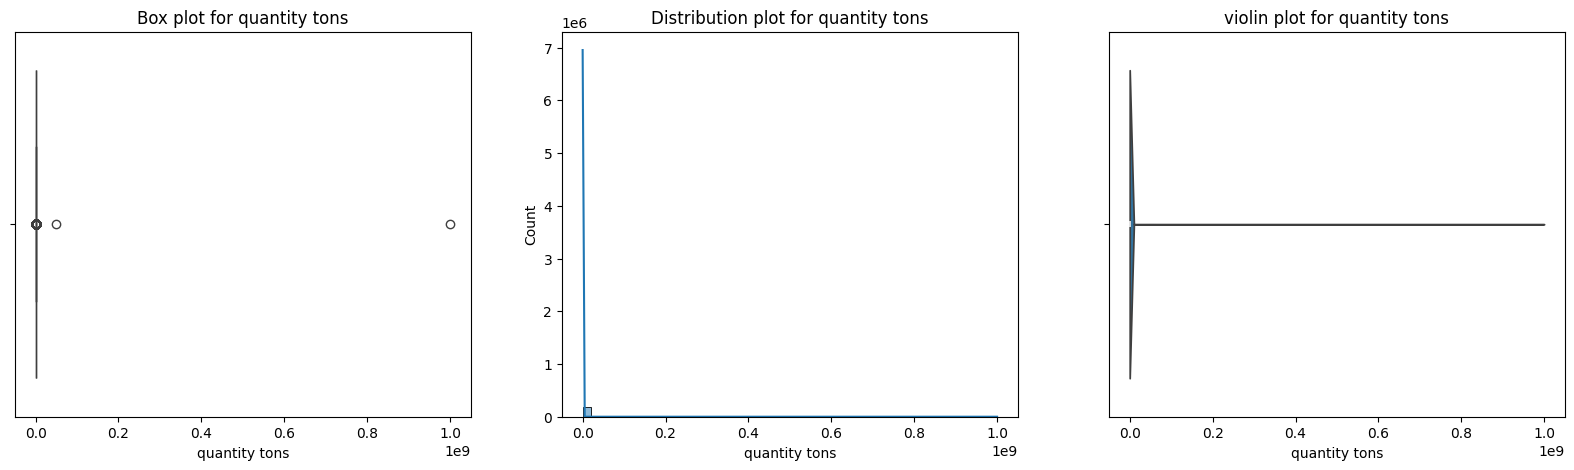

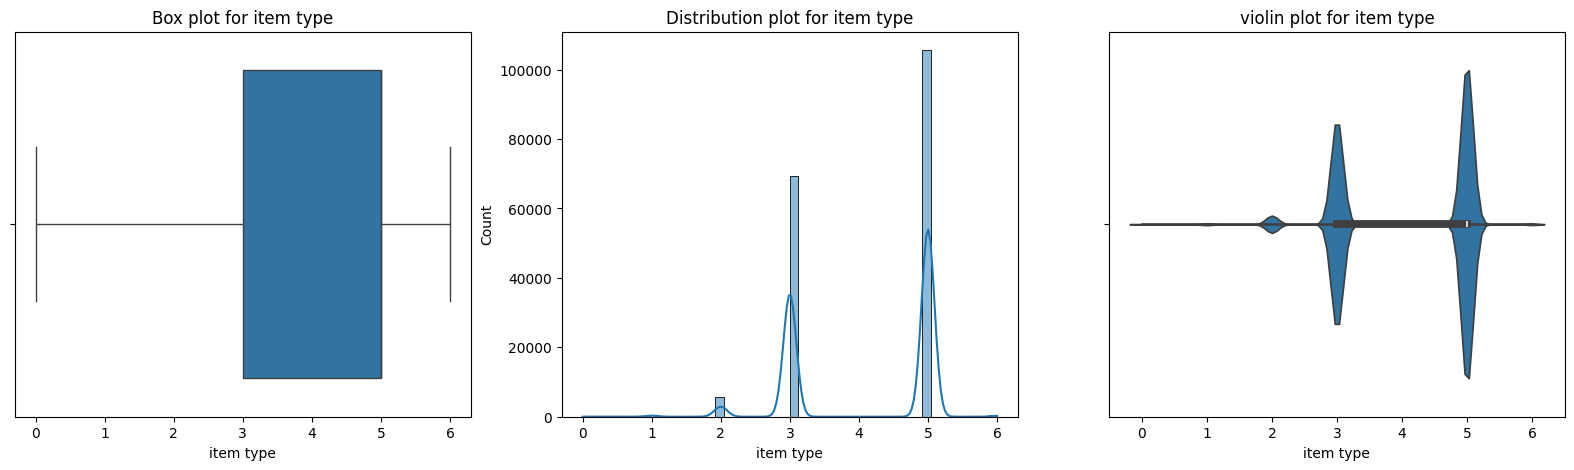

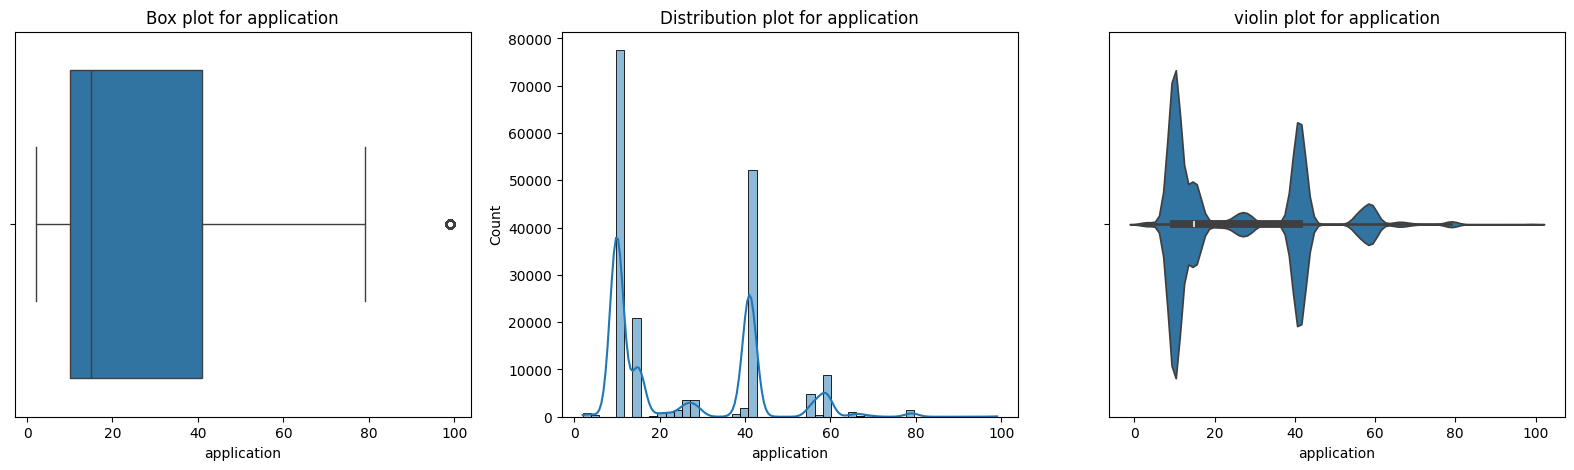

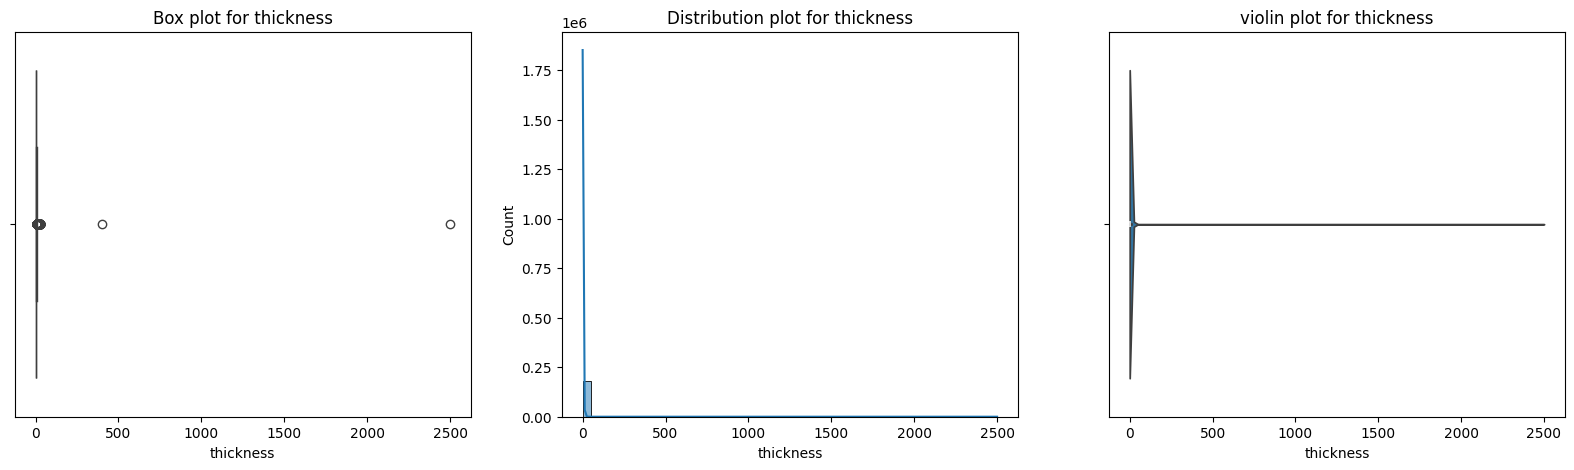

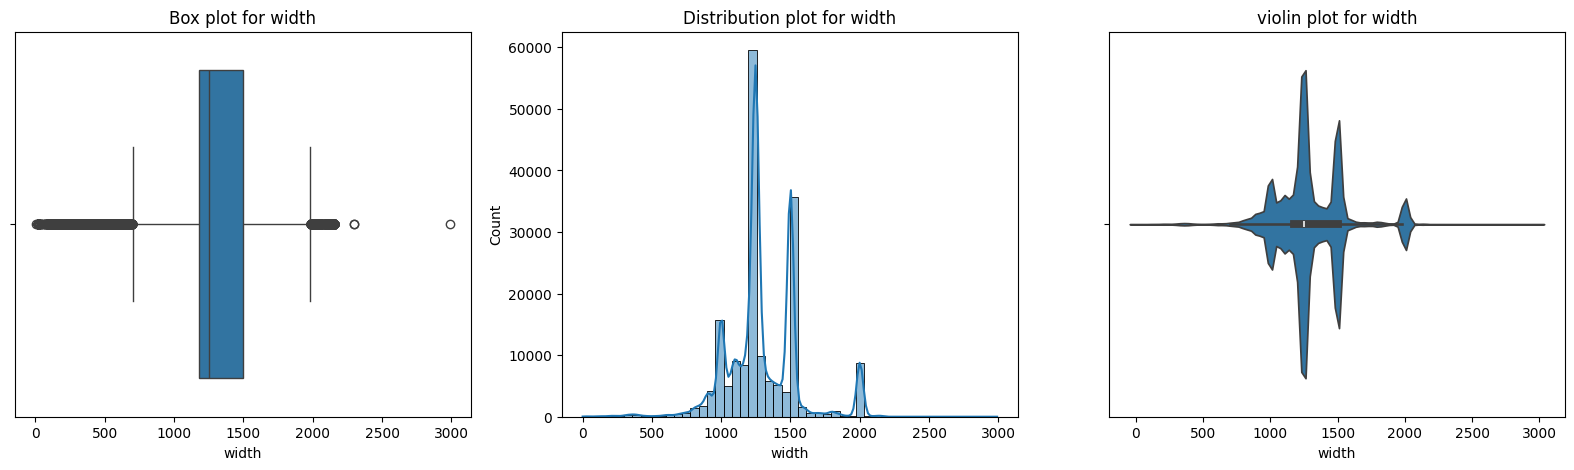

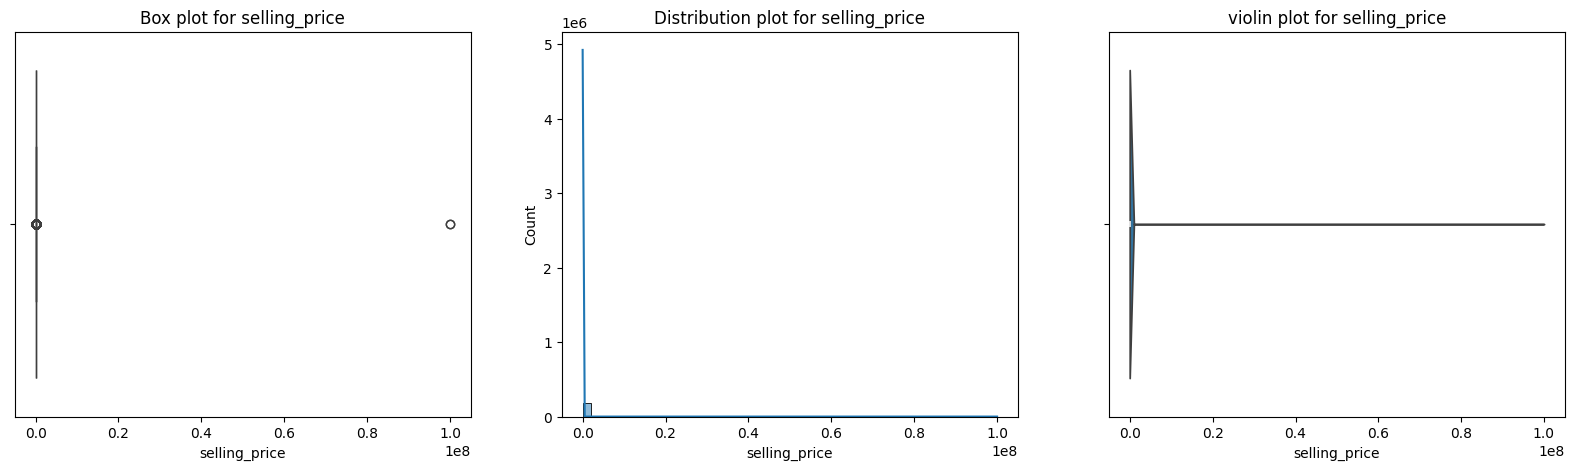

In [567]:
for i in ['quantity tons', 'item type', 'application', 'thickness', 'width', 'selling_price']:
    plot(df, i)

In [568]:
# quantity tons, thickness and selling price are skewed
#using the log transformation to distribute the data

df1 = df.copy()

df1['quantity tons log'] = np.log(df1['quantity tons'])
df1['thickness log'] = np.log(df1['thickness'])
df1['selling price log'] = np.log(df1['selling_price'])

df1

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,item_date_1,delivery_date_1,quantity tons log,thickness log,selling price log
0,20210401.0,54.151139,30156308.0,28.0,1,5.0,10.0,2.00,1500.0,1670798778,20210701.0,854.00,2021-04-01,2021-07-01,3.991779,0.693147,6.749931
1,20210401.0,768.024839,30202938.0,25.0,1,5.0,41.0,0.80,1210.0,1668701718,20210401.0,1047.00,2021-04-01,2021-04-01,6.643822,-0.223144,6.953684
2,20210401.0,386.127949,30153963.0,30.0,1,6.0,28.0,0.38,952.0,628377,20210101.0,644.33,2021-04-01,2021-01-01,5.956169,-0.967584,6.468211
3,20210401.0,202.411065,30349574.0,32.0,1,3.0,59.0,2.30,1317.0,1668701718,20210101.0,768.00,2021-04-01,2021-01-01,5.310301,0.832909,6.643790
4,20210401.0,785.526262,30211560.0,28.0,1,5.0,10.0,4.00,2000.0,640665,20210301.0,577.00,2021-04-01,2021-03-01,6.666354,1.386294,6.357842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,20200702.0,102.482422,30200854.0,25.0,1,5.0,41.0,0.96,1220.0,164141591,20200701.0,591.00,2020-07-02,2020-07-01,4.629691,-0.040822,6.381816
181669,20200702.0,208.086469,30200854.0,25.0,1,5.0,41.0,0.95,1500.0,164141591,20200701.0,589.00,2020-07-02,2020-07-01,5.337954,-0.051293,6.378426
181670,20200702.0,4.235594,30200854.0,25.0,1,5.0,41.0,0.71,1250.0,164141591,20200701.0,619.00,2020-07-02,2020-07-01,1.443523,-0.342490,6.428105
181671,20200702.0,30.365013,30200854.0,25.0,1,5.0,41.0,0.85,1250.0,164141591,20200701.0,601.00,2020-07-02,2020-07-01,3.413291,-0.162519,6.398595


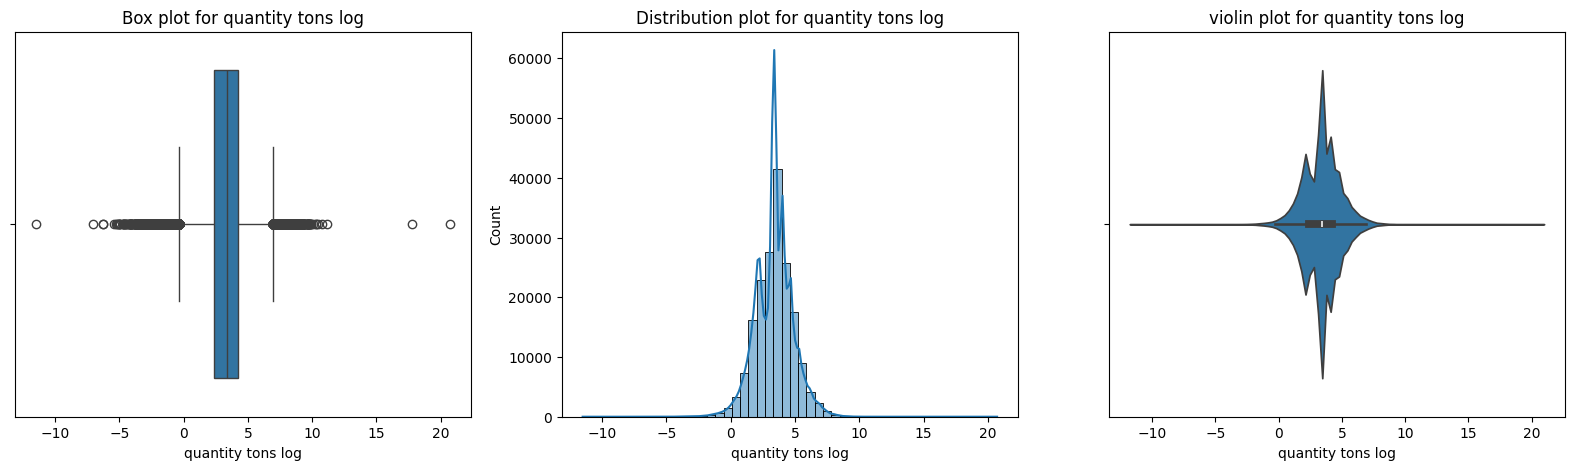

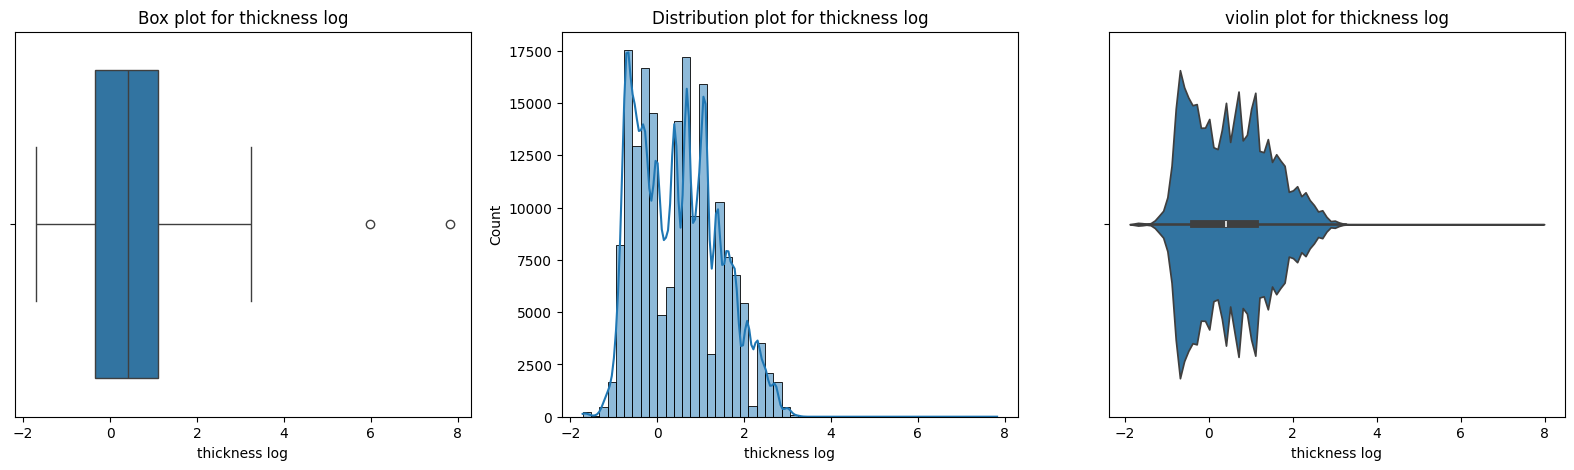

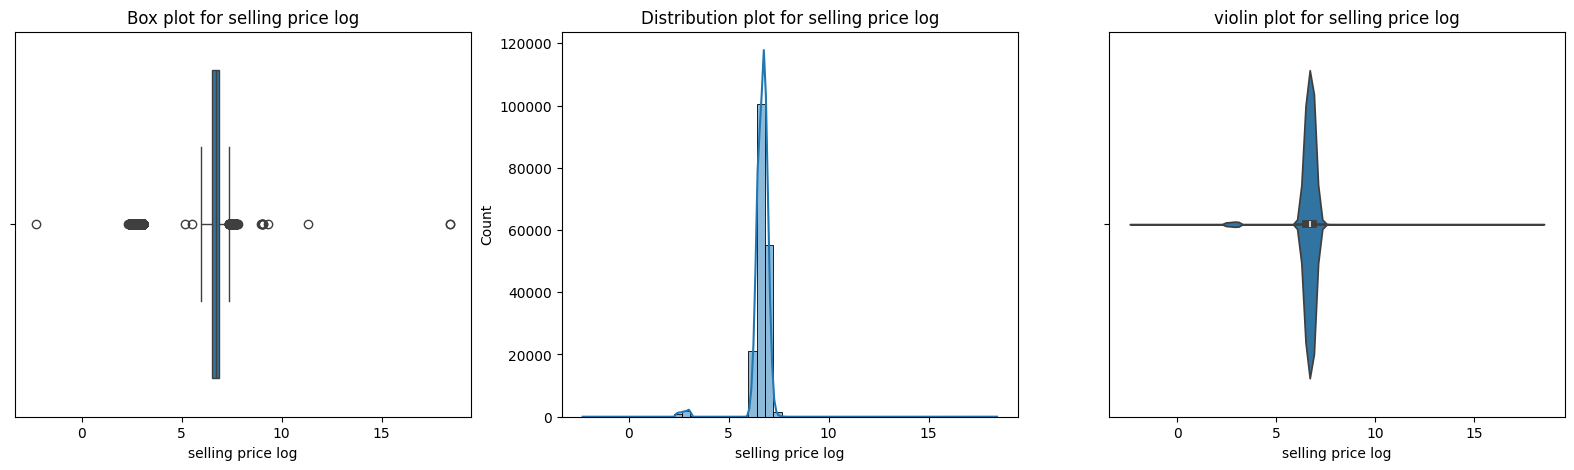

In [569]:
# after log transformation

for i in ['quantity tons log', 'thickness log', 'selling price log']:
    plot(df1, i)

After log transformation, the data is normally distributed now

### Outliers Handling - IQR Method

In [570]:
df2 = df1.copy()

In [571]:
# Using IQR method to handle the outliers

def treat_outliers(df, column):
  iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
  upper_threshold = df[column].quantile(0.75) + (1.5*iqr)
  lower_threshold = df[column].quantile(0.25) - (1.5*iqr)
  df[column] = df[column].clip(lower_threshold, upper_threshold)

In [572]:
treat_outliers(df2, 'quantity tons log')
treat_outliers(df2, 'thickness log')
treat_outliers(df2, 'width')
treat_outliers(df2, 'selling price log')

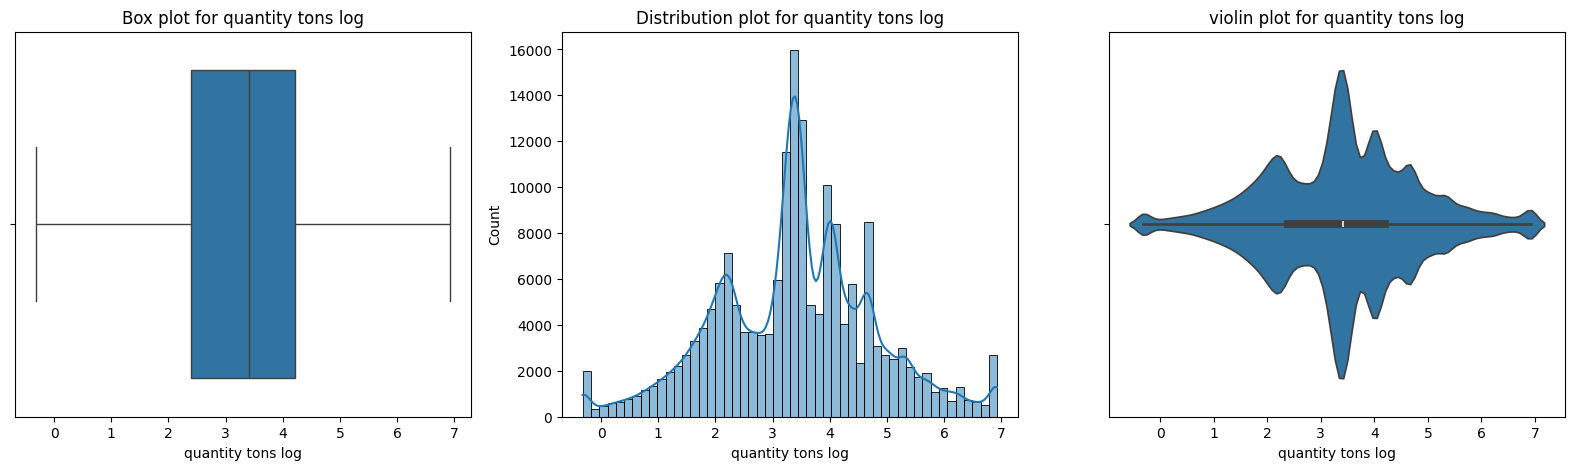

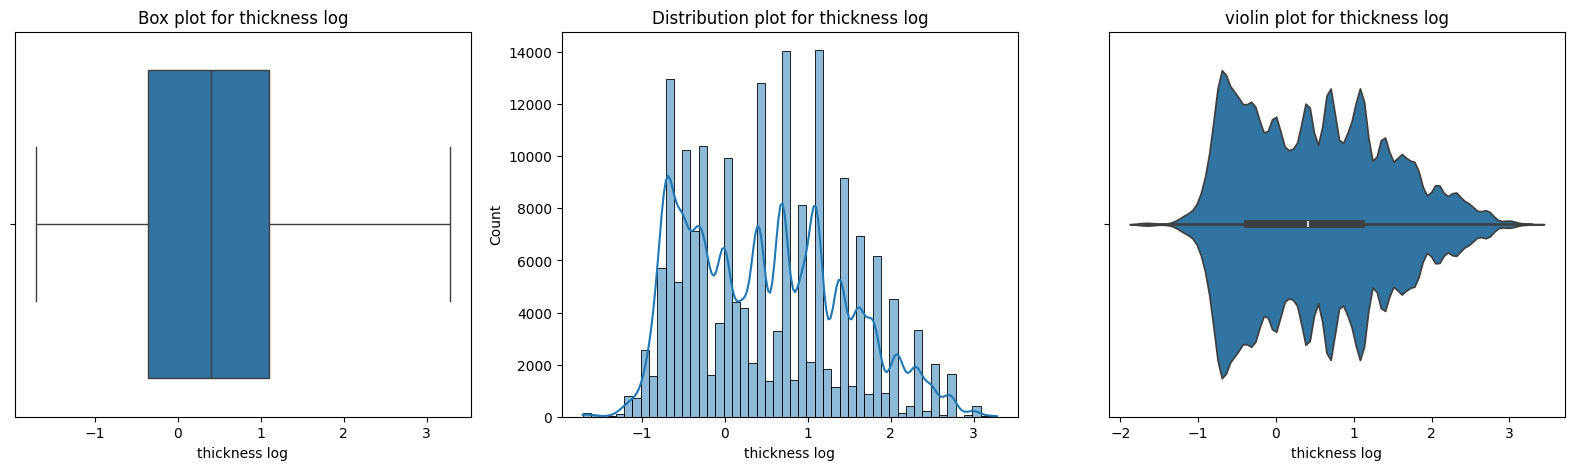

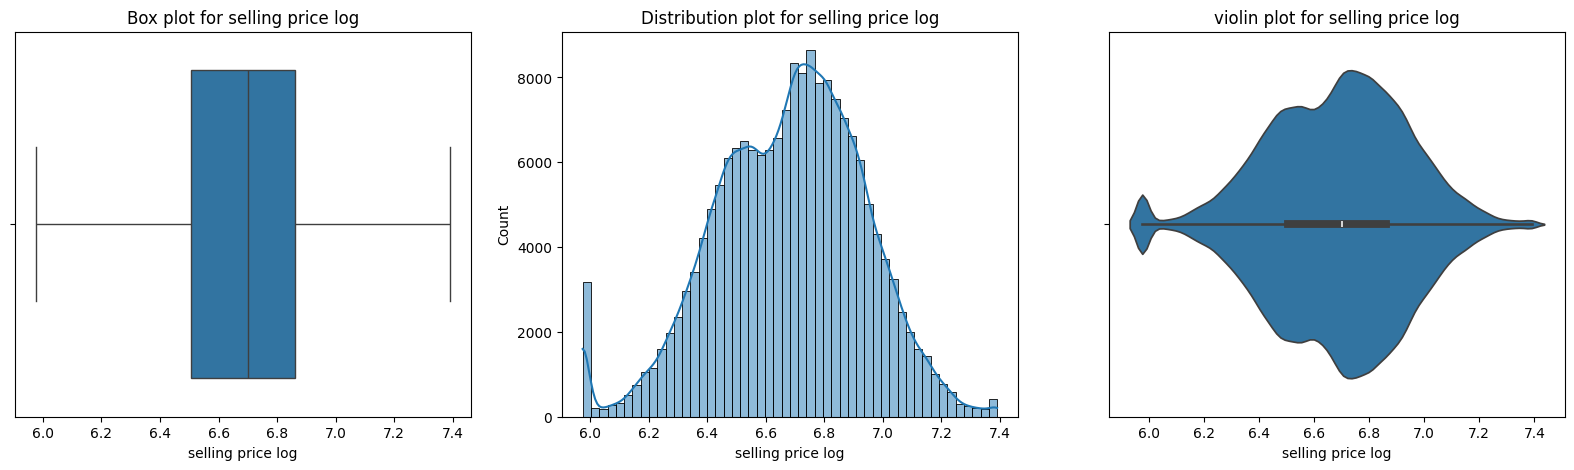

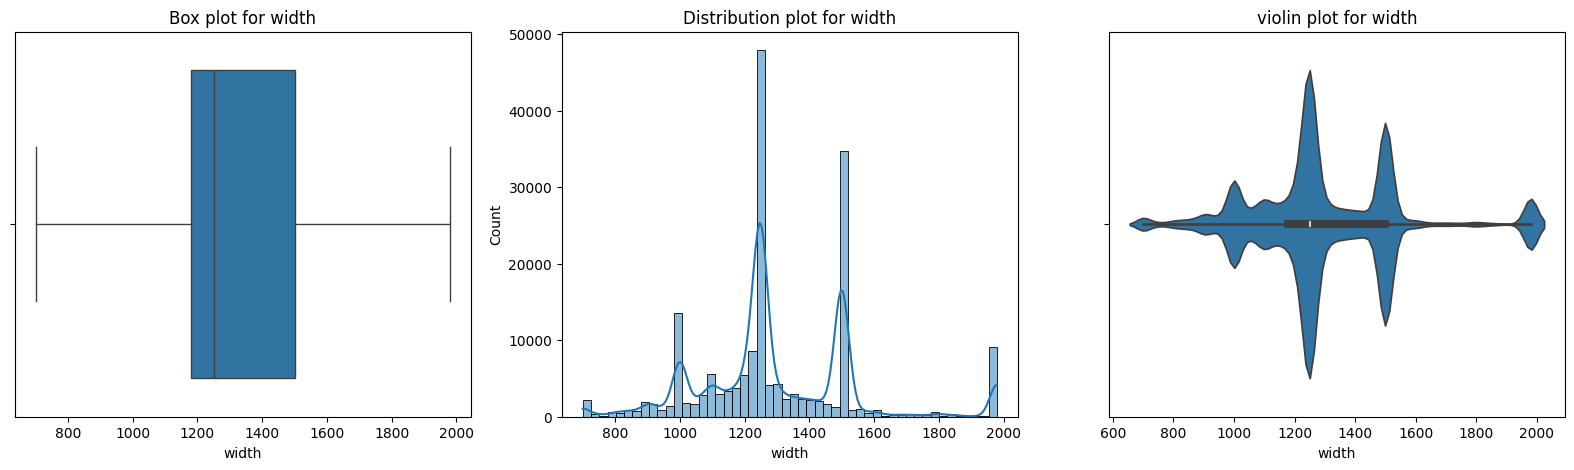

In [573]:
# after transforming the outliers data to within range

for i in ['quantity tons log', 'thickness log', 'selling price log', 'width']:
    plot(df2, i)

Outliers has been handled, and data distributed normally

In [574]:
# dropping the old columns of quantity tons, thickness and selling price

df3 = df2.drop(columns= ['quantity tons', 'thickness', 'selling_price'])
df3

,item_date,customer,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery_date_1,quantity tons log,thickness log,selling price log
0,20210401.0,30156308.0,28.0,1,5.0,10.0,1500.0,1670798778,20210701.0,2021-04-01,2021-07-01,3.991779,0.693147,6.749931
1,20210401.0,30202938.0,25.0,1,5.0,41.0,1210.0,1668701718,20210401.0,2021-04-01,2021-04-01,6.643822,-0.223144,6.953684
2,20210401.0,30153963.0,30.0,1,6.0,28.0,952.0,628377,20210101.0,2021-04-01,2021-01-01,5.956169,-0.967584,6.468211
3,20210401.0,30349574.0,32.0,1,3.0,59.0,1317.0,1668701718,20210101.0,2021-04-01,2021-01-01,5.310301,0.832909,6.643790
4,20210401.0,30211560.0,28.0,1,5.0,10.0,1980.0,640665,20210301.0,2021-04-01,2021-03-01,6.666354,1.386294,6.357842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,20200702.0,30200854.0,25.0,1,5.0,41.0,1220.0,164141591,20200701.0,2020-07-02,2020-07-01,4.629691,-0.040822,6.381816
181669,20200702.0,30200854.0,25.0,1,5.0,41.0,1500.0,164141591,20200701.0,2020-07-02,2020-07-01,5.337954,-0.051293,6.378426
181670,20200702.0,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-07-01,1.443523,-0.342490,6.428105
181671,20200702.0,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-07-01,3.413291,-0.162519,6.398595


<Axes: >

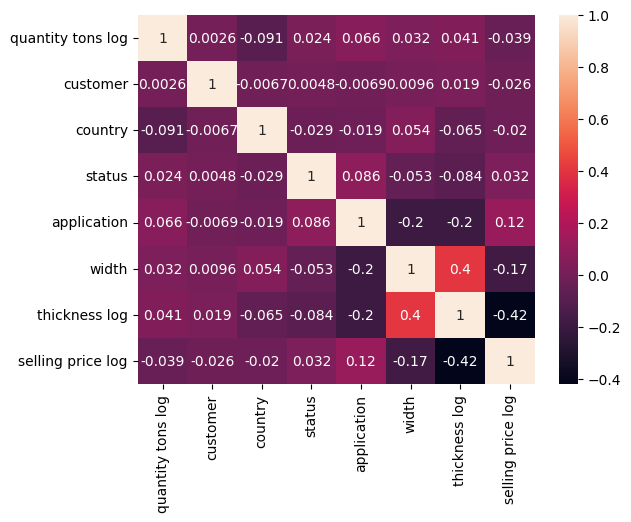

In [575]:
# checking columns correlation using heatmap

col = ['quantity tons log', 'customer', 'country', 'status', 'application', 'width', 'thickness log', 'selling price log']
heatmap = df3[col].corr()
sns.heatmap(heatmap, annot= True)

The highest and lowest values are 0.4 and -0.42(which is not >= 0.7)
So there is no need to drop any columns.

### Wrong delivery date handling

In [576]:
df4 = df3.copy()

In [577]:
df4

,item_date,customer,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery_date_1,quantity tons log,thickness log,selling price log
0,20210401.0,30156308.0,28.0,1,5.0,10.0,1500.0,1670798778,20210701.0,2021-04-01,2021-07-01,3.991779,0.693147,6.749931
1,20210401.0,30202938.0,25.0,1,5.0,41.0,1210.0,1668701718,20210401.0,2021-04-01,2021-04-01,6.643822,-0.223144,6.953684
2,20210401.0,30153963.0,30.0,1,6.0,28.0,952.0,628377,20210101.0,2021-04-01,2021-01-01,5.956169,-0.967584,6.468211
3,20210401.0,30349574.0,32.0,1,3.0,59.0,1317.0,1668701718,20210101.0,2021-04-01,2021-01-01,5.310301,0.832909,6.643790
4,20210401.0,30211560.0,28.0,1,5.0,10.0,1980.0,640665,20210301.0,2021-04-01,2021-03-01,6.666354,1.386294,6.357842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,20200702.0,30200854.0,25.0,1,5.0,41.0,1220.0,164141591,20200701.0,2020-07-02,2020-07-01,4.629691,-0.040822,6.381816
181669,20200702.0,30200854.0,25.0,1,5.0,41.0,1500.0,164141591,20200701.0,2020-07-02,2020-07-01,5.337954,-0.051293,6.378426
181670,20200702.0,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-07-01,1.443523,-0.342490,6.428105
181671,20200702.0,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-07-01,3.413291,-0.162519,6.398595


In [578]:
# Delivery dates are before the item date, which is wrong

In [579]:
#finding the diff bw delivery date and item date and adding a new column of that

df4['date difference'] = (df4['delivery_date_1'] - df4['item_date_1']).dt.days
df4.head()

,item_date,customer,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery_date_1,quantity tons log,thickness log,selling price log,date difference
0,20210401.0,30156308.0,28.0,1,5.0,10.0,1500.0,1670798778,20210701.0,2021-04-01,2021-07-01,3.991779,0.693147,6.749931,91
1,20210401.0,30202938.0,25.0,1,5.0,41.0,1210.0,1668701718,20210401.0,2021-04-01,2021-04-01,6.643822,-0.223144,6.953684,0
2,20210401.0,30153963.0,30.0,1,6.0,28.0,952.0,628377,20210101.0,2021-04-01,2021-01-01,5.956169,-0.967584,6.468211,-90
3,20210401.0,30349574.0,32.0,1,3.0,59.0,1317.0,1668701718,20210101.0,2021-04-01,2021-01-01,5.310301,0.832909,6.643790,-90
4,20210401.0,30211560.0,28.0,1,5.0,10.0,1980.0,640665,20210301.0,2021-04-01,2021-03-01,6.666354,1.386294,6.357842,-31


In [582]:
# convert the data type using pandas
df4['item_date_1'] = pd.to_datetime(df4['item_date_1'])

#splitting the day, month and year of item date column into separate columns

df4['item_date_day'] = df4['item_date_1'].dt.day
df4['item_date_month'] = df4['item_date_1'].dt.month
df4['item_date_year'] = df4['item_date_1'].dt.year
df4

,item_date,customer,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery_date_1,quantity tons log,thickness log,selling price log,date difference,item_date_day,item_date_month,item_date_year
0,20210401.0,30156308.0,28.0,1,5.0,10.0,1500.0,1670798778,20210701.0,2021-04-01,2021-07-01,3.991779,0.693147,6.749931,91,1,4,2021
1,20210401.0,30202938.0,25.0,1,5.0,41.0,1210.0,1668701718,20210401.0,2021-04-01,2021-04-01,6.643822,-0.223144,6.953684,0,1,4,2021
2,20210401.0,30153963.0,30.0,1,6.0,28.0,952.0,628377,20210101.0,2021-04-01,2021-01-01,5.956169,-0.967584,6.468211,-90,1,4,2021
3,20210401.0,30349574.0,32.0,1,3.0,59.0,1317.0,1668701718,20210101.0,2021-04-01,2021-01-01,5.310301,0.832909,6.643790,-90,1,4,2021
4,20210401.0,30211560.0,28.0,1,5.0,10.0,1980.0,640665,20210301.0,2021-04-01,2021-03-01,6.666354,1.386294,6.357842,-31,1,4,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,20200702.0,30200854.0,25.0,1,5.0,41.0,1220.0,164141591,20200701.0,2020-07-02,2020-07-01,4.629691,-0.040822,6.381816,-1,2,7,2020
181669,20200702.0,30200854.0,25.0,1,5.0,41.0,1500.0,164141591,20200701.0,2020-07-02,2020-07-01,5.337954,-0.051293,6.378426,-1,2,7,2020
181670,20200702.0,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-07-01,1.443523,-0.342490,6.428105,-1,2,7,2020
181671,20200702.0,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-07-01,3.413291,-0.162519,6.398595,-1,2,7,2020


In [583]:
# splitting the non-negative, correct values of date difference to separate dataframe

df_cr = df4[df4['date difference'] >= 0 ]

df_cr = df_cr.reset_index(drop= True)  # reset index
df_cr

,item_date,customer,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery_date_1,quantity tons log,thickness log,selling price log,date difference,item_date_day,item_date_month,item_date_year
0,20210401.0,30156308.0,28.0,1,5.0,10.0,1500.0,1670798778,20210701.0,2021-04-01,2021-07-01,3.991779,0.693147,6.749931,91,1,4,2021
1,20210401.0,30202938.0,25.0,1,5.0,41.0,1210.0,1668701718,20210401.0,2021-04-01,2021-04-01,6.643822,-0.223144,6.953684,0,1,4,2021
2,20210401.0,30202938.0,25.0,1,5.0,41.0,1265.0,1668701718,20210401.0,2021-04-01,2021-04-01,5.419608,0.405465,6.890609,0,1,4,2021
3,20210401.0,30209509.0,30.0,2,5.0,41.0,1125.0,611993,20210701.0,2021-04-01,2021-07-01,1.259203,-0.967584,5.975038,91,1,4,2021
4,20210401.0,30341428.0,38.0,1,3.0,10.0,1275.0,1668701376,20210701.0,2021-04-01,2021-07-01,4.235147,-0.510826,7.217443,91,1,4,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165560,20200702.0,30227718.0,25.0,0,3.0,15.0,1980.0,640665,20200801.0,2020-07-02,2020-08-01,3.472467,1.791759,6.313548,30,2,7,2020
165561,20200702.0,30161559.0,30.0,0,3.0,10.0,1525.0,640665,20200801.0,2020-07-02,2020-08-01,4.196171,1.348073,6.126869,30,2,7,2020
165562,20200702.0,30161559.0,30.0,0,3.0,10.0,1525.0,640665,20200801.0,2020-07-02,2020-08-01,4.156686,1.766442,6.124683,30,2,7,2020
165563,20200702.0,30161559.0,30.0,0,3.0,10.0,1500.0,640665,20200801.0,2020-07-02,2020-08-01,4.025862,2.060514,6.126869,30,2,7,2020


In [584]:
# splitting the negative, wrong values of date difference to separate dataframe

df_wr = df4[df4['date difference'] < 0 ]

df_wr = df_wr.reset_index(drop= True)  # reset index
df_wr

,item_date,customer,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery_date_1,quantity tons log,thickness log,selling price log,date difference,item_date_day,item_date_month,item_date_year
0,20210401.0,30153963.0,30.0,1,6.0,28.0,952.0,628377,20210101.0,2021-04-01,2021-01-01,5.956169,-0.967584,6.468211,-90,1,4,2021
1,20210401.0,30349574.0,32.0,1,3.0,59.0,1317.0,1668701718,20210101.0,2021-04-01,2021-01-01,5.310301,0.832909,6.643790,-90,1,4,2021
2,20210401.0,30211560.0,28.0,1,5.0,10.0,1980.0,640665,20210301.0,2021-04-01,2021-03-01,6.666354,1.386294,6.357842,-31,1,4,2021
3,20210401.0,30342192.0,32.0,1,5.0,41.0,1220.0,611993,20210101.0,2021-04-01,2021-01-01,4.730808,-0.385662,6.836259,-90,1,4,2021
4,20210401.0,30342192.0,32.0,1,5.0,41.0,1220.0,611993,20210101.0,2021-04-01,2021-01-01,4.736160,-0.597837,6.860664,-90,1,4,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16103,20200702.0,30200854.0,25.0,1,5.0,41.0,1220.0,164141591,20200701.0,2020-07-02,2020-07-01,4.629691,-0.040822,6.381816,-1,2,7,2020
16104,20200702.0,30200854.0,25.0,1,5.0,41.0,1500.0,164141591,20200701.0,2020-07-02,2020-07-01,5.337954,-0.051293,6.378426,-1,2,7,2020
16105,20200702.0,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-07-01,1.443523,-0.342490,6.428105,-1,2,7,2020
16106,20200702.0,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-07-01,3.413291,-0.162519,6.398595,-1,2,7,2020


In [585]:
# 16105 values of 'delivery date' are lesser than 'item date'.

In [586]:
# training the ML model with correct data frame to predict the correct delivery dates

In [587]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [588]:
df_cr.columns

Index(['item_date', 'customer', 'country', 'status', 'item type',
       'application', 'width', 'product_ref', 'delivery date', 'item_date_1',
       'delivery_date_1', 'quantity tons log', 'thickness log',
       'selling price log', 'date difference', 'item_date_day',
       'item_date_month', 'item_date_year'],
      dtype='object')

In [594]:
# using random forest regressor algorithm to train the model

def ml_date_diff():

    # training the model by using correct delivery date dataframe (df_cr)
    x = df_cr.drop(columns= ['item_date_1', 'delivery_date_1', 'date difference'], axis= 1)
    y = df_cr['date difference']
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2)

    model = RandomForestRegressor().fit(x_train, y_train)

    #predicitng the correct date difference of df_wr dataframe using model

    y_pred_list = []

    for index, row in df_wr.iterrows():
        input_data = row.drop(['item_date_1', 'delivery_date_1', 'date difference'])
        y_pred = model.predict([input_data])
        y_pred_list.append(y_pred[0])

    return y_pred_list

In [595]:
date_difference = ml_date_diff()

In [596]:
# print(date_difference)

In [597]:
#converting float values into integer

date_difference_1 = [int(round(i,0)) for i in date_difference]

In [426]:
# date_difference_1

In [598]:
# replacing the date difference column in df_wr dataframe

df_wr['date difference'] = pd.DataFrame(date_difference_1)
df_wr

,item_date,customer,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery_date_1,quantity tons log,thickness log,selling price log,date difference,item_date_day,item_date_month,item_date_year
0,20210401.0,30153963.0,30.0,1,6.0,28.0,952.0,628377,20210101.0,2021-04-01,2021-01-01,5.956169,-0.967584,6.468211,17,1,4,2021
1,20210401.0,30349574.0,32.0,1,3.0,59.0,1317.0,1668701718,20210101.0,2021-04-01,2021-01-01,5.310301,0.832909,6.643790,17,1,4,2021
2,20210401.0,30211560.0,28.0,1,5.0,10.0,1980.0,640665,20210301.0,2021-04-01,2021-03-01,6.666354,1.386294,6.357842,0,1,4,2021
3,20210401.0,30342192.0,32.0,1,5.0,41.0,1220.0,611993,20210101.0,2021-04-01,2021-01-01,4.730808,-0.385662,6.836259,17,1,4,2021
4,20210401.0,30342192.0,32.0,1,5.0,41.0,1220.0,611993,20210101.0,2021-04-01,2021-01-01,4.736160,-0.597837,6.860664,17,1,4,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16103,20200702.0,30200854.0,25.0,1,5.0,41.0,1220.0,164141591,20200701.0,2020-07-02,2020-07-01,4.629691,-0.040822,6.381816,30,2,7,2020
16104,20200702.0,30200854.0,25.0,1,5.0,41.0,1500.0,164141591,20200701.0,2020-07-02,2020-07-01,5.337954,-0.051293,6.378426,30,2,7,2020
16105,20200702.0,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-07-01,1.443523,-0.342490,6.428105,30,2,7,2020
16106,20200702.0,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-07-01,3.413291,-0.162519,6.398595,30,2,7,2020


In [599]:
# calculate delivery date (item date + date difference = delivery date)

def cal_delivery_date(item_date, date_difference):

    result_date = item_date + timedelta(days= date_difference)

    delivery_date = result_date.strftime("%Y%m%d")

    return delivery_date

In [600]:
# finding delivery date and adding it to the dataframe

df_wr['item_date_1'] = pd.to_datetime(df_wr['item_date_1'])

df_wr['delivery_date_1'] = df_wr.apply(lambda x: cal_delivery_date(x['item_date_1'], x['date difference']), axis= 1)
df_wr

,item_date,customer,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery_date_1,quantity tons log,thickness log,selling price log,date difference,item_date_day,item_date_month,item_date_year
0,20210401.0,30153963.0,30.0,1,6.0,28.0,952.0,628377,20210101.0,2021-04-01,20210418,5.956169,-0.967584,6.468211,17,1,4,2021
1,20210401.0,30349574.0,32.0,1,3.0,59.0,1317.0,1668701718,20210101.0,2021-04-01,20210418,5.310301,0.832909,6.643790,17,1,4,2021
2,20210401.0,30211560.0,28.0,1,5.0,10.0,1980.0,640665,20210301.0,2021-04-01,20210401,6.666354,1.386294,6.357842,0,1,4,2021
3,20210401.0,30342192.0,32.0,1,5.0,41.0,1220.0,611993,20210101.0,2021-04-01,20210418,4.730808,-0.385662,6.836259,17,1,4,2021
4,20210401.0,30342192.0,32.0,1,5.0,41.0,1220.0,611993,20210101.0,2021-04-01,20210418,4.736160,-0.597837,6.860664,17,1,4,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16103,20200702.0,30200854.0,25.0,1,5.0,41.0,1220.0,164141591,20200701.0,2020-07-02,20200801,4.629691,-0.040822,6.381816,30,2,7,2020
16104,20200702.0,30200854.0,25.0,1,5.0,41.0,1500.0,164141591,20200701.0,2020-07-02,20200801,5.337954,-0.051293,6.378426,30,2,7,2020
16105,20200702.0,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,20200801,1.443523,-0.342490,6.428105,30,2,7,2020
16106,20200702.0,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,20200801,3.413291,-0.162519,6.398595,30,2,7,2020


In [601]:
df_wr['delivery_date_1'] = pd.to_datetime(df_wr['delivery_date_1'], format = '%Y%m%d', errors= 'coerce')

In [603]:
df_wr

,item_date,customer,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery_date_1,quantity tons log,thickness log,selling price log,date difference,item_date_day,item_date_month,item_date_year
0,20210401.0,30153963.0,30.0,1,6.0,28.0,952.0,628377,20210101.0,2021-04-01,2021-04-18,5.956169,-0.967584,6.468211,17,1,4,2021
1,20210401.0,30349574.0,32.0,1,3.0,59.0,1317.0,1668701718,20210101.0,2021-04-01,2021-04-18,5.310301,0.832909,6.643790,17,1,4,2021
2,20210401.0,30211560.0,28.0,1,5.0,10.0,1980.0,640665,20210301.0,2021-04-01,2021-04-01,6.666354,1.386294,6.357842,0,1,4,2021
3,20210401.0,30342192.0,32.0,1,5.0,41.0,1220.0,611993,20210101.0,2021-04-01,2021-04-18,4.730808,-0.385662,6.836259,17,1,4,2021
4,20210401.0,30342192.0,32.0,1,5.0,41.0,1220.0,611993,20210101.0,2021-04-01,2021-04-18,4.736160,-0.597837,6.860664,17,1,4,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16103,20200702.0,30200854.0,25.0,1,5.0,41.0,1220.0,164141591,20200701.0,2020-07-02,2020-08-01,4.629691,-0.040822,6.381816,30,2,7,2020
16104,20200702.0,30200854.0,25.0,1,5.0,41.0,1500.0,164141591,20200701.0,2020-07-02,2020-08-01,5.337954,-0.051293,6.378426,30,2,7,2020
16105,20200702.0,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-08-01,1.443523,-0.342490,6.428105,30,2,7,2020
16106,20200702.0,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-08-01,3.413291,-0.162519,6.398595,30,2,7,2020


In [604]:
# concatinating both dataframes into one

df_final = pd.concat([df_cr, df_wr], axis= 0, ignore_index= True)
df_final

,item_date,customer,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery_date_1,quantity tons log,thickness log,selling price log,date difference,item_date_day,item_date_month,item_date_year
0,20210401.0,30156308.0,28.0,1,5.0,10.0,1500.0,1670798778,20210701.0,2021-04-01,2021-07-01,3.991779,0.693147,6.749931,91,1,4,2021
1,20210401.0,30202938.0,25.0,1,5.0,41.0,1210.0,1668701718,20210401.0,2021-04-01,2021-04-01,6.643822,-0.223144,6.953684,0,1,4,2021
2,20210401.0,30202938.0,25.0,1,5.0,41.0,1265.0,1668701718,20210401.0,2021-04-01,2021-04-01,5.419608,0.405465,6.890609,0,1,4,2021
3,20210401.0,30209509.0,30.0,2,5.0,41.0,1125.0,611993,20210701.0,2021-04-01,2021-07-01,1.259203,-0.967584,5.975038,91,1,4,2021
4,20210401.0,30341428.0,38.0,1,3.0,10.0,1275.0,1668701376,20210701.0,2021-04-01,2021-07-01,4.235147,-0.510826,7.217443,91,1,4,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,20200702.0,30200854.0,25.0,1,5.0,41.0,1220.0,164141591,20200701.0,2020-07-02,2020-08-01,4.629691,-0.040822,6.381816,30,2,7,2020
181669,20200702.0,30200854.0,25.0,1,5.0,41.0,1500.0,164141591,20200701.0,2020-07-02,2020-08-01,5.337954,-0.051293,6.378426,30,2,7,2020
181670,20200702.0,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-08-01,1.443523,-0.342490,6.428105,30,2,7,2020
181671,20200702.0,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-08-01,3.413291,-0.162519,6.398595,30,2,7,2020


In [606]:
#splitting the day, month and year of delivery date column into separate columns

df_final['delivery_date_day'] = df_final['delivery_date_1'].dt.day
df_final['delivery_date_month'] = df_final['delivery_date_1'].dt.month
df_final['delivery_date_year'] = df_final['delivery_date_1'].dt.year

In [607]:
#dropping the unwanted columns item date, delivery date, date difference

df_final.drop(columns=['item_date','delivery date','date difference'], inplace= True)
df_final

,customer,country,status,item type,application,width,product_ref,item_date_1,delivery_date_1,quantity tons log,thickness log,selling price log,item_date_day,item_date_month,item_date_year,delivery_date_day,delivery_date_month,delivery_date_year
0,30156308.0,28.0,1,5.0,10.0,1500.0,1670798778,2021-04-01,2021-07-01,3.991779,0.693147,6.749931,1,4,2021,1,7,2021
1,30202938.0,25.0,1,5.0,41.0,1210.0,1668701718,2021-04-01,2021-04-01,6.643822,-0.223144,6.953684,1,4,2021,1,4,2021
2,30202938.0,25.0,1,5.0,41.0,1265.0,1668701718,2021-04-01,2021-04-01,5.419608,0.405465,6.890609,1,4,2021,1,4,2021
3,30209509.0,30.0,2,5.0,41.0,1125.0,611993,2021-04-01,2021-07-01,1.259203,-0.967584,5.975038,1,4,2021,1,7,2021
4,30341428.0,38.0,1,3.0,10.0,1275.0,1668701376,2021-04-01,2021-07-01,4.235147,-0.510826,7.217443,1,4,2021,1,7,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,30200854.0,25.0,1,5.0,41.0,1220.0,164141591,2020-07-02,2020-08-01,4.629691,-0.040822,6.381816,2,7,2020,1,8,2020
181669,30200854.0,25.0,1,5.0,41.0,1500.0,164141591,2020-07-02,2020-08-01,5.337954,-0.051293,6.378426,2,7,2020,1,8,2020
181670,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,2020-07-02,2020-08-01,1.443523,-0.342490,6.428105,2,7,2020,1,8,2020
181671,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,2020-07-02,2020-08-01,3.413291,-0.162519,6.398595,2,7,2020,1,8,2020


In [609]:
df_final.drop(columns=['item_date_1','delivery_date_1'], inplace= True)
df_final

,customer,country,status,item type,application,width,product_ref,quantity tons log,thickness log,selling price log,item_date_day,item_date_month,item_date_year,delivery_date_day,delivery_date_month,delivery_date_year
0,30156308.0,28.0,1,5.0,10.0,1500.0,1670798778,3.991779,0.693147,6.749931,1,4,2021,1,7,2021
1,30202938.0,25.0,1,5.0,41.0,1210.0,1668701718,6.643822,-0.223144,6.953684,1,4,2021,1,4,2021
2,30202938.0,25.0,1,5.0,41.0,1265.0,1668701718,5.419608,0.405465,6.890609,1,4,2021,1,4,2021
3,30209509.0,30.0,2,5.0,41.0,1125.0,611993,1.259203,-0.967584,5.975038,1,4,2021,1,7,2021
4,30341428.0,38.0,1,3.0,10.0,1275.0,1668701376,4.235147,-0.510826,7.217443,1,4,2021,1,7,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,30200854.0,25.0,1,5.0,41.0,1220.0,164141591,4.629691,-0.040822,6.381816,2,7,2020,1,8,2020
181669,30200854.0,25.0,1,5.0,41.0,1500.0,164141591,5.337954,-0.051293,6.378426,2,7,2020,1,8,2020
181670,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,1.443523,-0.342490,6.428105,2,7,2020,1,8,2020
181671,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,3.413291,-0.162519,6.398595,2,7,2020,1,8,2020


In [610]:
df_final.dtypes

customer               float64
country                float64
status                   int64
item type              float64
application            float64
width                  float64
product_ref              int64
quantity tons log      float64
thickness log          float64
selling price log      float64
item_date_day            int32
item_date_month          int32
item_date_year           int32
delivery_date_day        int32
delivery_date_month      int32
delivery_date_year       int32
dtype: object

In [611]:
df_final.to_csv('copper_data_final.csv', index = False)
df_final.shape

(181673, 16)

The dataset is ready to build a ML model.

## Classification Method - Predict the Status

In [612]:
from imblearn.combine import SMOTETomek
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

In [613]:
df_final.head()

,customer,country,status,item type,application,width,product_ref,quantity tons log,thickness log,selling price log,item_date_day,item_date_month,item_date_year,delivery_date_day,delivery_date_month,delivery_date_year
0,30156308.0,28.0,1,5.0,10.0,1500.0,1670798778,3.991779,0.693147,6.749931,1,4,2021,1,7,2021
1,30202938.0,25.0,1,5.0,41.0,1210.0,1668701718,6.643822,-0.223144,6.953684,1,4,2021,1,4,2021
2,30202938.0,25.0,1,5.0,41.0,1265.0,1668701718,5.419608,0.405465,6.890609,1,4,2021,1,4,2021
3,30209509.0,30.0,2,5.0,41.0,1125.0,611993,1.259203,-0.967584,5.975038,1,4,2021,1,7,2021
4,30341428.0,38.0,1,3.0,10.0,1275.0,1668701376,4.235147,-0.510826,7.217443,1,4,2021,1,7,2021


In [614]:
df_final.dtypes

customer               float64
country                float64
status                   int64
item type              float64
application            float64
width                  float64
product_ref              int64
quantity tons log      float64
thickness log          float64
selling price log      float64
item_date_day            int32
item_date_month          int32
item_date_year           int32
delivery_date_day        int32
delivery_date_month      int32
delivery_date_year       int32
dtype: object

In [615]:
df_c = df_final.copy()

# filtering the status column values only 1 and 0 in the new data frame ('won': 1, 'Lost': 0)
df_c = df_c[(df_c.status == 1) | (df_c.status == 0)]
df_c

,customer,country,status,item type,application,width,product_ref,quantity tons log,thickness log,selling price log,item_date_day,item_date_month,item_date_year,delivery_date_day,delivery_date_month,delivery_date_year
0,30156308.0,28.0,1,5.0,10.0,1500.0,1670798778,3.991779,0.693147,6.749931,1,4,2021,1,7,2021
1,30202938.0,25.0,1,5.0,41.0,1210.0,1668701718,6.643822,-0.223144,6.953684,1,4,2021,1,4,2021
2,30202938.0,25.0,1,5.0,41.0,1265.0,1668701718,5.419608,0.405465,6.890609,1,4,2021,1,4,2021
4,30341428.0,38.0,1,3.0,10.0,1275.0,1668701376,4.235147,-0.510826,7.217443,1,4,2021,1,7,2021
5,30202938.0,25.0,1,5.0,41.0,1165.0,1668701718,6.446714,0.405465,6.890609,1,4,2021,1,4,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,30200854.0,25.0,1,5.0,41.0,1220.0,164141591,4.629691,-0.040822,6.381816,2,7,2020,1,8,2020
181669,30200854.0,25.0,1,5.0,41.0,1500.0,164141591,5.337954,-0.051293,6.378426,2,7,2020,1,8,2020
181670,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,1.443523,-0.342490,6.428105,2,7,2020,1,8,2020
181671,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,3.413291,-0.162519,6.398595,2,7,2020,1,8,2020


In [616]:
# checking no. of records in each value

df_c['status'].value_counts()

status
1    116012
0     34438
Name: count, dtype: int64

In [617]:
# in status feature, the 'Won' and 'Lost' value difference is very high. So we need to oversample to reduce the difference.

x = df_c.drop(['status'], axis= 1)
y = df_c['status']

x_new, y_new = SMOTETomek().fit_resample(x,y)

In [618]:
x.shape, y.shape, x_new.shape, y_new.shape

((150450, 15), (150450,), (229532, 15), (229532,))

In [619]:
# checking the accuracy of training and testing using metrics

def ml_classification(x_new, y_new, algorithm):
    
    x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size= 0.2, random_state= 42)
    model = algorithm().fit(x_train, y_train)

    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    accuracy_train = metrics.accuracy_score(y_train, y_pred_train)
    accuracy_test = metrics.accuracy_score(y_test, y_pred_test)

    accuracy_metrics = {'algorithm': algorithm.__name__,
                        'accuraccy_train': accuracy_train,
                        'accuracy_test': accuracy_test}
    
    return accuracy_metrics

In [620]:
# comparing different classifier for better results

print(ml_classification(x_new, y_new, DecisionTreeClassifier))
print(ml_classification(x_new, y_new, ExtraTreesClassifier))
print(ml_classification(x_new, y_new, RandomForestClassifier))
print(ml_classification(x_new, y_new, AdaBoostClassifier))
print(ml_classification(x_new, y_new, GradientBoostingClassifier))
print(ml_classification(x_new, y_new, XGBClassifier))

{'algorithm': 'DecisionTreeClassifier', 'accuraccy_train': 1.0, 'accuracy_test': 0.9669984969612477}
{'algorithm': 'ExtraTreesClassifier', 'accuraccy_train': 1.0, 'accuracy_test': 0.9867122661032086}
{'algorithm': 'RandomForestClassifier', 'accuraccy_train': 1.0, 'accuracy_test': 0.98446859955998}
{'algorithm': 'AdaBoostClassifier', 'accuraccy_train': 0.7682614023144997, 'accuracy_test': 0.7682270677674429}
{'algorithm': 'GradientBoostingClassifier', 'accuraccy_train': 0.8209503063308373, 'accuracy_test': 0.8213126538436404}
{'algorithm': 'XGBClassifier', 'accuraccy_train': 0.9528985704560926, 'accuracy_test': 0.9468708475831572}


In [621]:
# got good accuracy after oversampling
# RandomForestClassifier has good interpretability, so selecting that algorithm

In [622]:
# moving to cross validation - GridSearchCV

# Hyper parameter tuning - we give parameter values manually in the algorithm to reduce the overfitting issue and get better accuracy.

# so using gridserachcv method - to pass the mulitiple values in each parameter and it evaluates all the combination of values and
# finally returns the best accuracy parameter values based on the score.

In [623]:
# parameter values reference: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [624]:
x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size= 0.2, random_state= 42)

param_grid = {'max_depth'        : [2, 5, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf' : [1, 2, 4],
              'max_features'     : ['sqrt', 'log2']}

grid_search = GridSearchCV(estimator= RandomForestClassifier(), param_grid= param_grid, cv= 5, n_jobs= -1)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [625]:
# returns the best parameters based on score
grid_search.best_params_

{'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [626]:
grid_search.best_score_

0.9713219877467665

In [627]:
# passing the best params in the random forest algorithm and check the accuracy for training and testing

x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size= 0.2, random_state= 42)

model = RandomForestClassifier(max_depth = 20, max_features = 'sqrt', min_samples_leaf = 1, min_samples_split = 2).fit(x_train, y_train)
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

accuracy_train = metrics.accuracy_score(y_train, y_pred_train)
accuracy_test = metrics.accuracy_score(y_test, y_pred_test)
accuracy_train, accuracy_test

(0.9883458134785569, 0.9744701243819025)

In [629]:
# confusion matrix

x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size= 0.2, random_state= 42)

model = RandomForestClassifier(max_depth = 20, max_features = 'sqrt', min_samples_leaf = 1, min_samples_split = 2).fit(x_train, y_train)
y_pred = model.predict(x_test)

print(confusion_matrix(y_true= y_test, y_pred= y_pred))
print(classification_report(y_true= y_test, y_pred= y_pred))

[[22943   192]
 [ 1011 21761]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     23135
           1       0.99      0.96      0.97     22772

    accuracy                           0.97     45907
   macro avg       0.97      0.97      0.97     45907
weighted avg       0.97      0.97      0.97     45907



In [630]:
# Receiver Operating Curve (ROC) and Area Under the Curve (AUC)

FP, TP, threshold = roc_curve(y_true= y_test, y_score= y_pred)
auc_curve = auc(x= FP, y= TP)
print(auc_curve)

0.9736521293330515


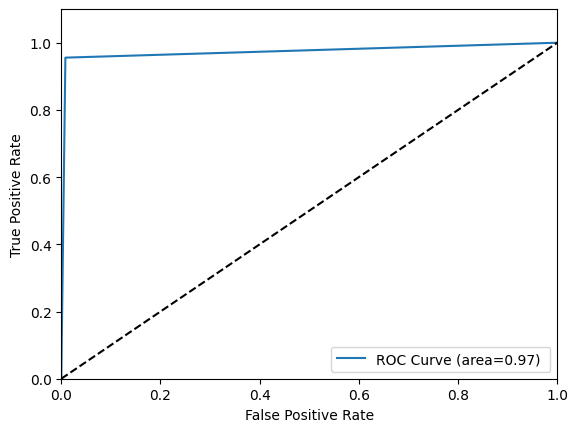

In [631]:
plt.plot(FP, TP, label=f"ROC Curve (area={round(auc_curve, 2)}) ")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.10])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

In [632]:
# passing the user data manually to check the prediction status of our model

user_data = np.array([[30153711, 28, 5, 27, 980, 625688, 5.2, -0.97, 6.23, 3, 5, 2021, 5, 7, 2021]])
y_p = model.predict(user_data)
if y_p[0] == 1:
    print('Won')
else:
    print('Lose')

Won


In [633]:
user_data = np.array([[30235367, 81, 6, 11, 1498, 1667563287, 2.1, 3, 7.11, 1, 4, 2021, 1, 7, 2021]])
y_p = model.predict(user_data)
if y_p[0] == 1:
    print('Won')
else:
    print('Lose')

Won


In [635]:
# saving the classification model by using pickle

import pickle

with open('classification_model.pkl', 'wb') as file:
    pickle.dump(model, file)

Model saved successfully

In [636]:
# load the pickle model to predict the status

with open('/Users/gokul/My Apple/vs_code_practice/copper_model/classification_model.pkl', 'rb') as file:
    model = pickle.load(file)

user_data = np.array([[30235367, 81, 6, 11, 1498, 1667563287, 2.1, 3, 7.11, 1, 4, 2021, 2, 5, 2021]])
y_p = model.predict(user_data)
if y_p[0] == 1:
    print('Won')
else:
    print('Lose')

Won


## Regression Method - Predict Selling Price

In [637]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [646]:
df_final

,customer,country,status,item type,application,width,product_ref,quantity tons log,thickness log,selling price log,item_date_day,item_date_month,item_date_year,delivery_date_day,delivery_date_month,delivery_date_year
0,30156308.0,28.0,1,5.0,10.0,1500.0,1670798778,3.991779,0.693147,6.749931,1,4,2021,1,7,2021
1,30202938.0,25.0,1,5.0,41.0,1210.0,1668701718,6.643822,-0.223144,6.953684,1,4,2021,1,4,2021
2,30202938.0,25.0,1,5.0,41.0,1265.0,1668701718,5.419608,0.405465,6.890609,1,4,2021,1,4,2021
3,30209509.0,30.0,2,5.0,41.0,1125.0,611993,1.259203,-0.967584,5.975038,1,4,2021,1,7,2021
4,30341428.0,38.0,1,3.0,10.0,1275.0,1668701376,4.235147,-0.510826,7.217443,1,4,2021,1,7,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,30200854.0,25.0,1,5.0,41.0,1220.0,164141591,4.629691,-0.040822,6.381816,2,7,2020,1,8,2020
181669,30200854.0,25.0,1,5.0,41.0,1500.0,164141591,5.337954,-0.051293,6.378426,2,7,2020,1,8,2020
181670,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,1.443523,-0.342490,6.428105,2,7,2020,1,8,2020
181671,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,3.413291,-0.162519,6.398595,2,7,2020,1,8,2020


In [647]:
df_final.columns

Index(['customer', 'country', 'status', 'item type', 'application', 'width',
       'product_ref', 'quantity tons log', 'thickness log',
       'selling price log', 'item_date_day', 'item_date_month',
       'item_date_year', 'delivery_date_day', 'delivery_date_month',
       'delivery_date_year'],
      dtype='object')

In [650]:
# check the train and test accuracy using R2 (R-squared ---> coefficient of determination) to predict selling price

def ml_regression(df, algorithm):
    
    x = df.drop(columns= ['selling price log'], axis= 1)
    y = df['selling price log']
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 42)
    model = algorithm().fit(x_train, y_train)

    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    accuracy_metrics = {'algorithm': algorithm.__name__,
                        'R2_train': r2_train,
                        'R2_test' : r2_test}
    
    return accuracy_metrics

In [651]:
print(ml_regression(df_final, DecisionTreeRegressor))
print(ml_regression(df_final, ExtraTreesRegressor))
print(ml_regression(df_final, RandomForestRegressor))
print(ml_regression(df_final, AdaBoostRegressor))
print(ml_regression(df_final, GradientBoostingRegressor))
print(ml_regression(df_final, XGBRegressor))

{'algorithm': 'DecisionTreeRegressor', 'R2_train': 0.9999206991163908, 'R2_test': 0.9238378587050063}
{'algorithm': 'ExtraTreesRegressor', 'R2_train': 0.9999206991163908, 'R2_test': 0.954420913704491}
{'algorithm': 'RandomForestRegressor', 'R2_train': 0.9940360726256551, 'R2_test': 0.957237135225747}
{'algorithm': 'AdaBoostRegressor', 'R2_train': 0.6599219003554841, 'R2_test': 0.6565849779743785}
{'algorithm': 'GradientBoostingRegressor', 'R2_train': 0.887943585536585, 'R2_test': 0.8882646243185475}
{'algorithm': 'XGBRegressor', 'R2_train': 0.9513853244916117, 'R2_test': 0.9451236868392957}


In [652]:
# selecting RandomForestClassifier which has good interpretability.

In [653]:
x = df_final.drop(columns = ['selling price log'], axis = 1)
y = df_final['selling price log']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

param_grid_reg = {'max_depth'        : [2, 5, 10, 20],
                  'min_samples_split': [2, 5, 10],
                  'min_samples_leaf' : [1, 2, 4],
                  'max_features'     : ['sqrt', 'log2', None]}

grid_search_reg = GridSearchCV(estimator = RandomForestRegressor(), param_grid = param_grid_reg, cv = 5, n_jobs = -1)
grid_search_reg.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 10, 20],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [660]:
# best parameters from grid search

print(grid_search_reg.best_params_) 
grid_search_reg.best_score_

{'max_depth': 20, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


0.953162564336165

In [663]:
# passing the best paramseters to check the accuracy for training, testing and overfitting

x = df_final.drop(columns = ['selling price log'], axis = 1)
y = df_final['selling price log']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 42)

model = RandomForestRegressor(max_depth = 20, max_features = None, min_samples_leaf = 1, min_samples_split = 2).fit(x_train, y_train)
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

r2_train, r2_test

(0.9866110319380433, 0.9563848279623542)

In [664]:
# before hypertuning = 'RandomForestRegressor', 'R2_train': 0.991018999148562, 'R2_test': 0.9359088863097613

# comparing both before and after hypertuning, reduced the overfitting in training

In [666]:
# calculating the mae, mse, rmse for the model

x = df_final.drop(columns = ['selling price log'], axis = 1)
y = df_final['selling price log']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 42)

model = RandomForestRegressor(max_depth = 20, max_features = None, min_samples_leaf = 1, min_samples_split = 2).fit(x_train, y_train)
y_pred = model.predict(x_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

metrics_reg = {'R2': r2,
               'Mean Absolute Error': mae,
               'Mean Squared Error': mse,
               'Root Mean Squared Error': rmse}

metrics_reg

{'R2': 0.9560941481437528,
 'Mean Absolute Error': 0.03242831432519987,
 'Mean Squared Error': 0.002890897123678008,
 'Root Mean Squared Error': 0.053767063558260345}

In [667]:
# manually passing the inputs to predict the selling price

# 30200854, 25, 1, 5,	41,	1240, 164141591, 4.7, -0.04, 2, 7, 2020, 8, 8, 2020
user_data = np.array([[302054,2, 1, 5,	41,	1240, 16411, 4, 0, 2, 7, 2023, 8, 8, 2020]])
y_pred = model.predict(user_data)
y_pred[0]

6.577979114854182

In [668]:
# using Inverse Log Transformation to convert the value to original scale of the data (exp)
np.exp(y_pred[0])

719.084672364014

In [669]:
# saving the Regression model by using pickle

import pickle

with open('regression_model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [670]:
# load the pickle model to predict selling price

with open('/Users/gokul/My Apple/vs_code_practice/copper_model/regression_model.pkl', 'rb') as f:
    model = pickle.load(f)

y_pred = model.predict(np.array([[30202938,25,1,5,41,1210,1668701718,6.6,-0.2,1,4,2021,1,4,2021]]))
np.exp(y_pred[0])

1032.5106655276768